In [1]:
def findexact(str, substr, index=0):
  offset = str.find(substr)
  ln = len(substr)
  if not index:
    return offset
  return offset + ln + findexact(str[offset+ln :], substr, index-1)

def multifind(str, substrs):
  ret = len(str)
  for substr in substrs:
    index = findexact(str, substr)
    if index > -1 and index < ret:
      ret = index
  if ret == len(str):
    ret = -1
  return ret

In [61]:
!pip install gdown --quiet
!pip install docx2txt --quiet

import gdown
import docx2txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

In [50]:
!gdown 12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb

txt = docx2txt.process("CCXXXI: la guirlande de Julie.docx")

Downloading...
From: https://drive.google.com/uc?id=12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb
To: /content/CCXXXI: la guirlande de Julie.docx
100% 406k/406k [00:00<00:00, 67.7MB/s]


In [51]:
months = ["vendémiaire", "brumaire", "frimaire", "nivôse", "pluviôse", "ventôse",
          "germinal", "floréal", "prairial", "messidor", "thermidor", "fructidor"]
for month in months:
  txt = txt.replace(month.upper(), "")

labels = ["monologue", "story", "fanfic", "chguestk", "cliff", "letter", "lyrics"]

df = pd.DataFrame(columns=["name", "day", "month", "greg_day", "greg_month", "label", "text"])

while(multifind(txt, labels) != -1):
  start = multifind(txt, labels)
  label = txt[start : txt.find(" ", start)]
  txt = txt[start + len(label) :]
  day = pd.Series({
      "name" : txt[findexact(txt, " ", 3) + 1 : findexact(txt, "\n")],
      "day" : int(txt[findexact(txt, " ", 1) + 1 : findexact(txt, " ", 2)]),
      "month" : txt[findexact(txt, " ", 2) + 1 : findexact(txt, ".", 1)],
      "greg_day" : int(txt[findexact(txt, "(") + 1 : findexact(txt, ".")]),
      "greg_month" : int(txt[findexact(txt, ".") + 1 : findexact(txt, ")")]),
      "label" : label,
      "text" : txt[findexact(txt, "\n", 1) + 1 : multifind(txt, labels)],
      "sentences" : None,
  })
  df = pd.concat([df, day.to_frame().T], ignore_index=True)

In [52]:
df["words"] = df["text"].map(lambda x: len(x.replace("-", "").split()))
df["symbols"] = df["text"].map(lambda x: len(x.replace(" ", "")))
df["capitals"] = df["text"].map(lambda x: len(list(filter(lambda c: c.isupper(), x))))
df["dashes"] = df["text"].map(lambda x: len(list(filter(lambda w: w == "-", x.split()))))
df["questions"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "?", x))))
df["exclamations"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "!", x))))
df["newlines"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "\n", x))))
df["text"] = df["text"].map(lambda x: " ".join(x.split()))

df["sentences"] = df["text"].map(lambda x: len(x.replace("?", ".").replace("!", ".").replace("…", ".").split(". ")))

In [53]:
df

,name,day,month,greg_day,greg_month,label,text,sentences,words,symbols,capitals,dashes,questions,exclamations,newlines
0,raisin,1,vendémiaire,23,9,monologue,люди не изменились. ароматная жидкость мягко к...,17,238,1361,0,4,2,0,22
1,safran,2,vendémiaire,24,9,story,Сафран горд своим прозвищем. нет большого смыс...,21,333,1954,5,3,1,1,14
2,châtaigne,3,vendémiaire,25,9,story,Кристине исполняется четыре года. белокурая ма...,30,514,2838,10,13,5,2,14
3,colchique,4,vendémiaire,26,9,story,с тихим звонком открываются двери лифта. мягки...,39,339,1947,30,12,6,2,40
4,cheval,5,vendémiaire,27,9,story,Келлер Долль привычным движением запрыгивает в...,22,374,2266,10,4,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,laurier tin,6,pluviôse,26,1,letter,"вот она, твоя хвалёная зима. чего же в ней хор...",12,256,1424,0,6,2,0,6
126,amadouvier,7,pluviôse,27,1,fanfic,"раздирает душу смотреть, как тот, кого ты люби...",23,382,2001,2,9,2,2,10
127,mézéréon,8,pluviôse,28,1,story,девушка сидела на невысоком пеньке посреди пол...,18,330,1886,0,5,1,0,14
128,peuplier,9,pluviôse,29,1,story,"в чердачной каморке Пьеро темным-темно, но он ...",22,459,2458,7,6,1,0,10


In [54]:
df[df["label"] == "fanfic"].sort_values(by=["words"], ascending=False)

,name,day,month,greg_day,greg_month,label,text,sentences,words,symbols,capitals,dashes,questions,exclamations,newlines
18,tournesol,19,vendémiaire,11,10,fanfic,"сам он, по сути, никогда не стремился к соверш...",24,474,2486,6,11,0,0,26
126,amadouvier,7,pluviôse,27,1,fanfic,"раздирает душу смотреть, как тот, кого ты люби...",23,382,2001,2,9,2,2,10
114,chat,25,nivôse,15,1,fanfic,такие женщины - кошки. так же они очаровательн...,14,329,1661,1,7,0,0,10
80,érable sucré,21,frimaire,12,12,fanfic,густая жидкость янтарного оттенка медленно рас...,18,325,1904,4,7,1,0,14
91,houille,2,nivôse,23,12,fanfic,"бред пеленой застилает глаза, превращает прохо...",18,321,1783,2,9,0,0,14
28,orge,29,vendémiaire,21,10,fanfic,она разносит напитки в баре. и от привычке к э...,18,319,1771,4,15,0,1,14
103,grès,14,nivôse,4,1,fanfic,"забудьте всё, что помнили о ней, как забываю э...",22,314,1671,3,6,2,0,14
105,silex,16,nivôse,6,1,fanfic,"ты будто стоишь на краю обрыва, с трепетом заг...",17,303,1564,1,7,0,0,6
60,raiponce,1,frimaire,22,11,fanfic,"жизнь была сказкой. ярко-разноцветной, как кар...",13,279,1652,2,5,0,0,14
63,nèfle,4,frimaire,25,11,fanfic,"вместо холода, твёрдости, разложения, которых ...",16,272,1546,3,6,1,0,14


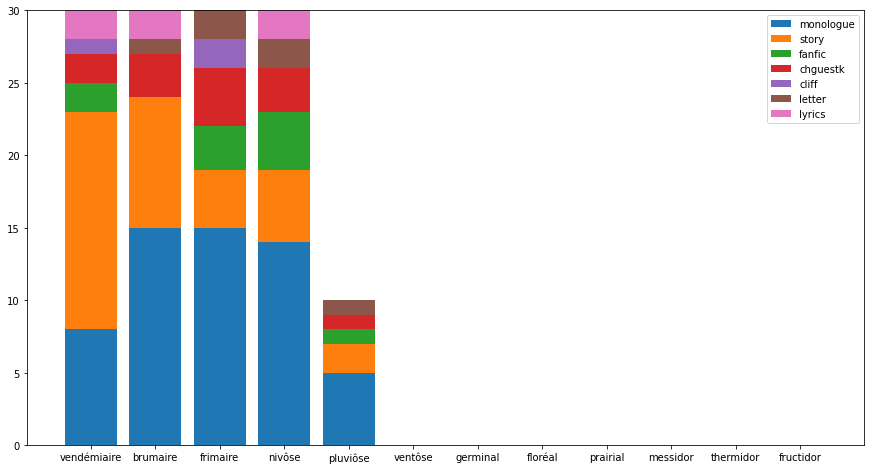

In [55]:
fig = plt.figure(figsize=(15, 8))
bottom = np.zeros(len(months))
for label in labels:
  count = np.empty(0)
  for month in months:
    count = np.append(count, df[(df["month"] == month) & (df["label"] == label)].shape[0])
  plt.bar(np.asarray(months), count, label=label, bottom=bottom)
  bottom += count
plt.legend()
plt.show()

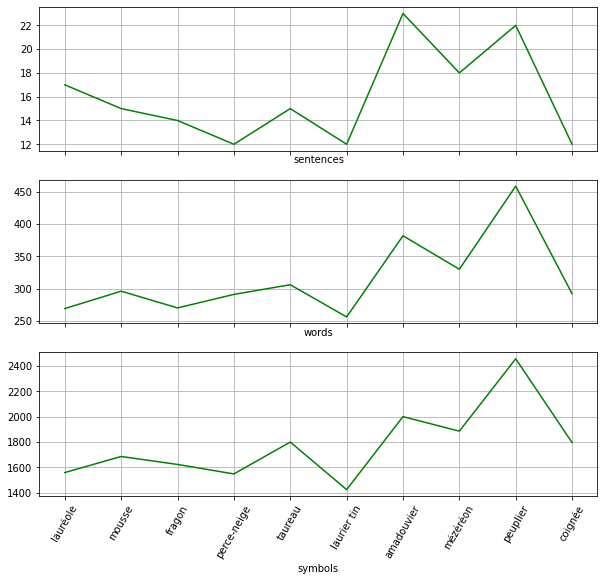

In [56]:
batch = df[df["month"] == months[4]]

plots = ["sentences", "words", "symbols"]
# plots = ["capitals", "dashes", "questions", "exclamations", "newlines"]
fig, axs = plt.subplots(len(plots), 1, sharex=True, figsize=(batch.shape[0], 3 * len(plots)))
for i in range(len(plots)):
  axs[i].plot(batch["name"], batch[plots[i]], 'g')
  axs[i].set_xlabel(plots[i])
  axs[i].grid()
plt.xticks(rotation=60)
plt.show()

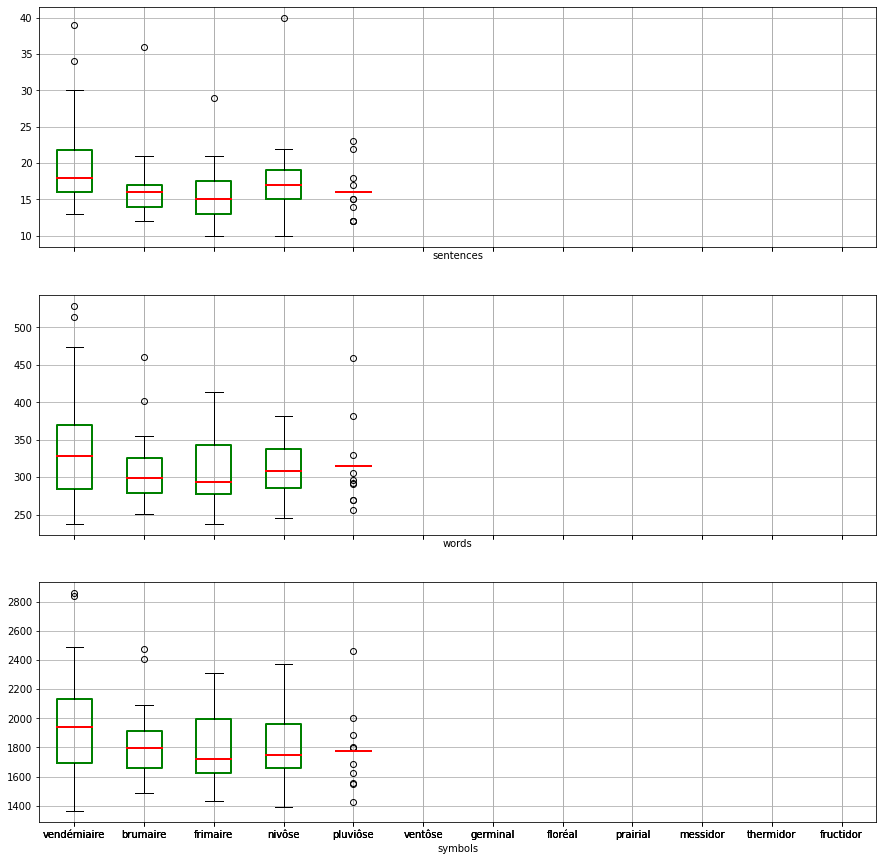

In [57]:
boxprops = dict(linewidth=2, color='g')
medianprops = dict(linewidth=2, color='r')

plots = ["sentences", "words", "symbols"]
fig, axs = plt.subplots(len(plots), 1, sharex=True, figsize=(15, 5 * len(plots)))
for i in range(len(plots)):
  stat = pd.DataFrame(columns=months)
  for month in months:
    stat[month] = df[df["month"] == month][plots[i]].reset_index(drop=True)
    stat[month].fillna(stat[month].mean(), inplace=True)
  axs[i].boxplot(stat.to_numpy(), labels=stat.columns, widths=0.5, boxprops=boxprops, medianprops=medianprops)
  axs[i].set_xlabel(plots[i])
  axs[i].grid()
plt.suptitle("")
plt.show()

linreg MSE:  6.897435897435898
ridge MSE:  3.7028407991089582


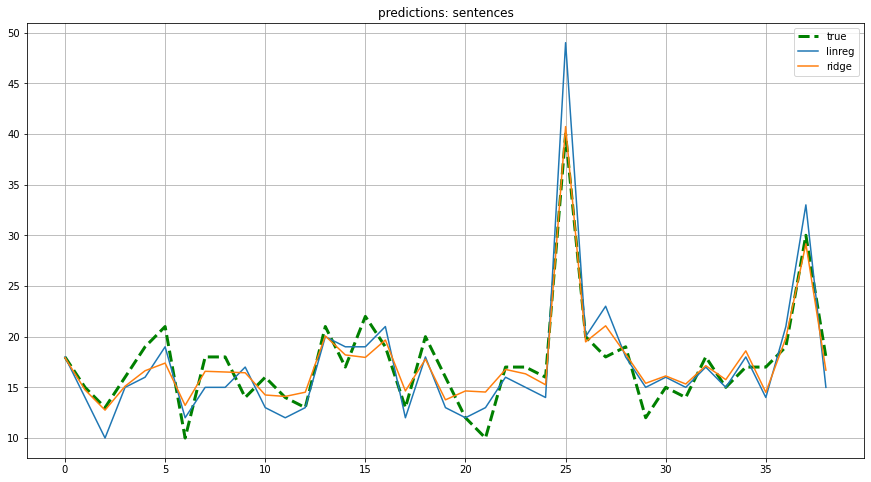

In [58]:
target_column = "sentences"
dum_df = pd.get_dummies(data=df, columns=["month", "label"]).drop(columns=["name", "text"])
X, y = dum_df.drop(columns=[target_column]), dum_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

params = np.arange(0, 150, 1)
loss = []
for p in params:
  model = Ridge(alpha=p, random_state=88).fit(X_train, y_train)
  y_pred = model.predict(X_test)
  loss.append(mean_squared_error(y_test, y_pred))
alpha = params[np.argmin(loss)]

reg = LinearRegression().fit(X_train, y_train)
y_pred_reg = reg.predict(X_test).astype(int)
ridge = Ridge(alpha=alpha, random_state=88).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("linreg MSE: ", mean_squared_error(y_test, y_pred_reg))
print("ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))

fig = plt.figure(figsize=(15, 8))
plt.plot(range(len(y_test)), y_test, label="true", color='g', linewidth=3, linestyle="dashed")
plt.plot(range(len(y_pred_reg)), y_pred_reg, label="linreg")
plt.plot(range(len(y_pred_ridge)), y_pred_ridge, label="ridge")
plt.title("predictions: " + target_column)
plt.grid()
plt.legend()
plt.show()

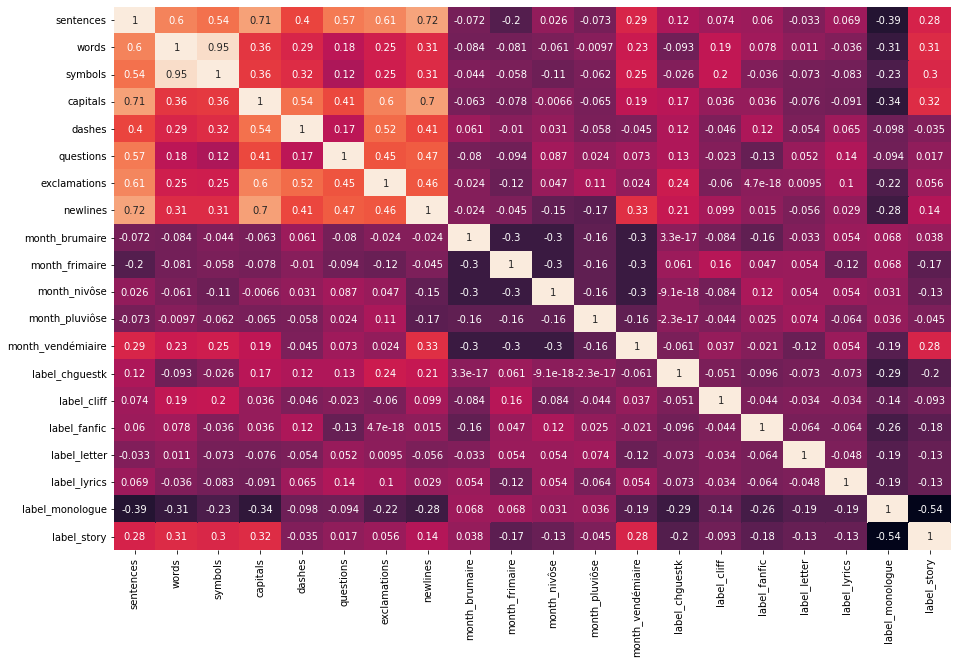

In [59]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(dum_df.corr(), annot=True, cbar=False)

In [ ]:
ops = list(map(lambda x: x[:findexact(x, " ", 0)], df["text"]))
ops.sort(key=lambda x: x.lower())

In [ ]:
# todo: something that has to do with text processing ?

In [65]:
df.groupby("label")["sentences"].mean()

label
chguestk     19.076923
cliff        19.666667
fanfic       18.300000
letter       16.500000
lyrics       18.833333
monologue    15.052632
story        19.542857
Name: sentences, dtype: float64

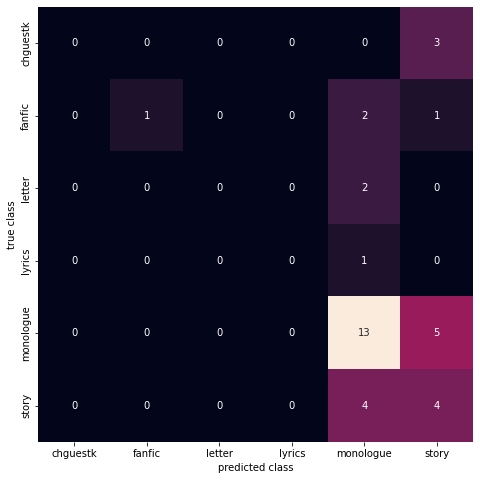

In [72]:
target_column = "label"
clf_dum_df = pd.get_dummies(data=df, columns=["month"]).drop(columns=["name", "text"])
X, y = clf_dum_df.drop(columns=[target_column]), clf_dum_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier(random_state=88).fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

# print("accuracy: ", classification_report(y_test, y_pred_clf, labels=clf.classes_, zero_division=0, output_dict=True)["accuracy"])

fig = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_clf, labels=clf.classes_),
            xticklabels=clf.classes_, yticklabels=clf.classes_, annot=True, cbar=False, square=True)
plt.xlabel("predicted class")
plt.ylabel("true class")
plt.show()